In [2]:
import pandas as pd

df=pd.read_csv("melb_data.csv")

cols_to_use=['Rooms','Distance','Landsize','BuildingArea','YearBuilt']

x=df[cols_to_use]

y=df.Price


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
my_pipeline=Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=50,random_state=0))
])

In [5]:
from sklearn.model_selection import cross_val_score

scores=-1* cross_val_score(my_pipeline,x,y,cv=5,scoring='neg_mean_absolute_error')

scores

array([301628.7893587 , 303164.4782723 , 287298.331666  , 236061.84754543,
       260383.45111427])

In [6]:
scores.mean()

277707.3795913405

### Practice

In [8]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

df.dropna(axis=0,subset=['SalePrice'],inplace=True)
y=df.SalePrice

df.drop('SalePrice',axis=1,inplace=True)


num_cols=[col for col in df.columns if df[col].dtype in ['int64','float64']]

x=df[num_cols].copy()
X_test=df_test[num_cols].copy()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline=Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=50,random_state=0))
])


from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, x, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())


Average MAE score: 18311.538589041094


In [10]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators,random_state=0))])
    scores = -1 * cross_val_score(my_pipeline, x, y,cv=3,scoring='neg_mean_absolute_error')
    return scores.mean()

In [12]:
results ={}
for i in range(50,451,50):
    results[i]=get_score(i)
# Your code here
print(results)

{50: 18409.027726372657, 100: 18519.787720865974, 150: 18426.771403054638, 200: 18351.788673269057, 250: 18318.492487444473, 300: 18360.60077991191, 350: 18364.796403516713, 400: 18354.404404376615, 450: 18345.877844815688}


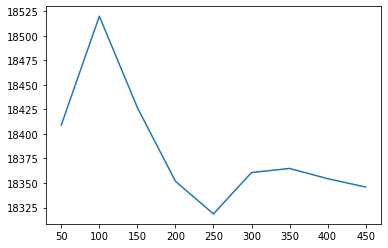

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [15]:
BestEstimator=250